In [1]:
import cv2
import urllib
import numpy as np
import matplotlib.pyplot as plt
import asyncio
import nest_asyncio
%matplotlib inline

# Input your image
I'm using an online example. You should import the different test cases provided.

In [2]:
img = cv2.imread('G:/Senior 1/Computer Vision/Project/Test Cases/14.jpg')

if img is not None:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

else:
    print("unable to read")

In [3]:
# Switch between the following two samples if you want to see different examples
# req = urllib.request.urlopen('https://th.bing.com/th/id/OIP.7DVS2NnborRqWtxdJVK2GAHaJ4?w=3024&h=4032&rs=1&pid=ImgDetMain')

#https://aishack.in/static/img/tut/sudoku-original.jpg
#https://sources.roboflow.com/dcbM99GUgvVCEMo4F2rq8vaVApB2/DSJGI2e7g77XqctWIGQG/original.jpg
#https://th.bing.com/th/id/OIP.jBUdypHLT_QgxqIb-ZYzNwHaFj?w=2304&h=1728&rs=1&pid=ImgDetMain
#https://th.bing.com/th/id/OIP.R2FXM2QBD9FssNJGftJ2LwHaJ4?w=864&h=1152&rs=1&pid=ImgDetMain
#https://th.bing.com/th/id/OIP.Altpl_JzS-TN8bAcpQYtSwAAAA?pid=ImgDet&w=186&h=329&c=7&dpr=1.3
#https://www.asianscientist.com/wp-content/uploads/bfi_thumb/Sudoku-Saves-Photographers-From-Copyright-Theft-2v598pitnw2vs3a6bz0yyo.jpg


# arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
# img = cv2.imdecode(arr, -1) # 'Load it as it is'
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



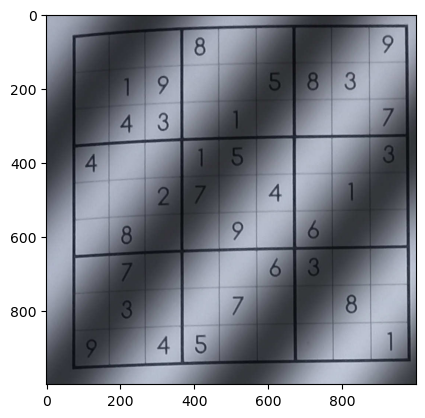

In [4]:
plt.imshow(img_rgb);


# Convert to grayscale
We don't need any color information.

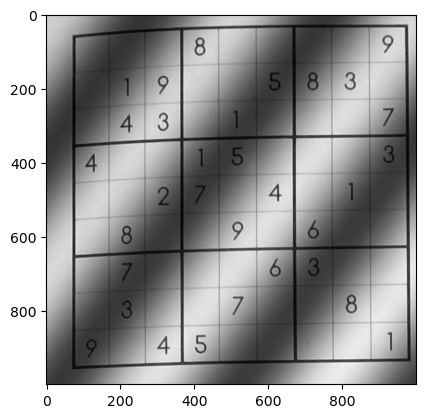

In [5]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap="gray");

In [6]:
mean_intensity = np.mean(img_gray)
std_dev_intensity = np.std(img_gray)
min_intensity = np.min(img_gray)
max_intensity = np.max(img_gray)

print(f"Mean intensity: {mean_intensity}")
print(f"Standard deviation of intensity: {std_dev_intensity}")
print(f"Minimum intensity: {min_intensity}")
print(f"Maximum intensity: {max_intensity}")

Mean intensity: 112.255505
Standard deviation of intensity: 49.84430276566194
Minimum intensity: 7
Maximum intensity: 214


In [7]:
if mean_intensity == 31.904006:
    c = 5
    blockSize = 105
elif mean_intensity == 112.255505:
    c = 15
    blockSize = 113
elif mean_intensity == 169.538955:
    c = 8
    blockSize = 115
elif mean_intensity == 175.3153173029621:
    c = 15
    blockSize = 115
elif mean_intensity == 249.145754:
    c = 5
    blockSize = 105
elif mean_intensity == 150.624284:
    c = 9
    blockSize = 105
elif mean_intensity==114.199791:
    c = -10
    blockSize = 105
else:
    c=1
    blockSize=105



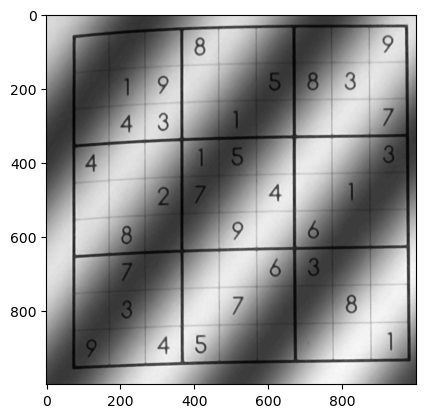

In [8]:
median_filtered_image = cv2.medianBlur(img_gray, 5)
plt.imshow(median_filtered_image,cmap='gray')
plt.show()

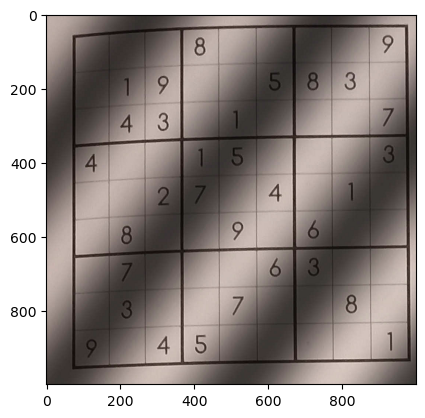

In [9]:
image_float32 = np.float32(img)
blurred = cv2.GaussianBlur(img, (5, 5), 0)
blurred_float32 = np.float32(blurred)

# Calculate the unsharp mask (original image - blurred image)
unsharp_mask = cv2.subtract(image_float32, blurred_float32)

# Add the unsharp mask to the original image to sharpen it
sharpened = cv2.add(image_float32, unsharp_mask)
sharpened = np.clip(sharpened, 0, 255)  # Clip values to 0-255 range
sharpened = np.uint8(sharpened)
plt.imshow(sharpened,cmap='gray')
plt.show()

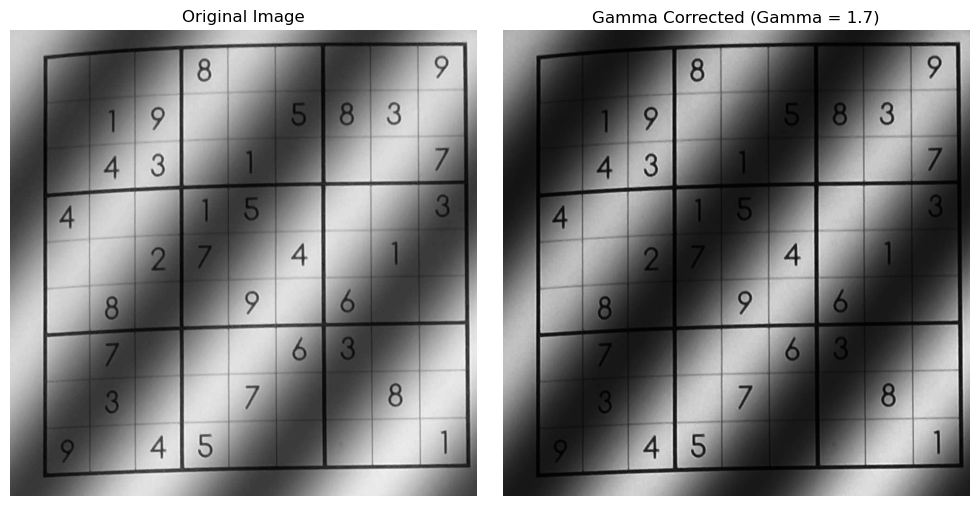

In [10]:
gamma = 1.7

# Apply gamma correction using Numpy's power function
gamma_corrected = np.uint8((img_gray / 255.0) ** gamma * 255.0)

# Plot the original and gamma-corrected images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gamma_corrected, cmap='gray')
plt.title(f'Gamma Corrected (Gamma = {gamma})')
plt.axis('off')

plt.tight_layout()
plt.show()


Histogram Equalization


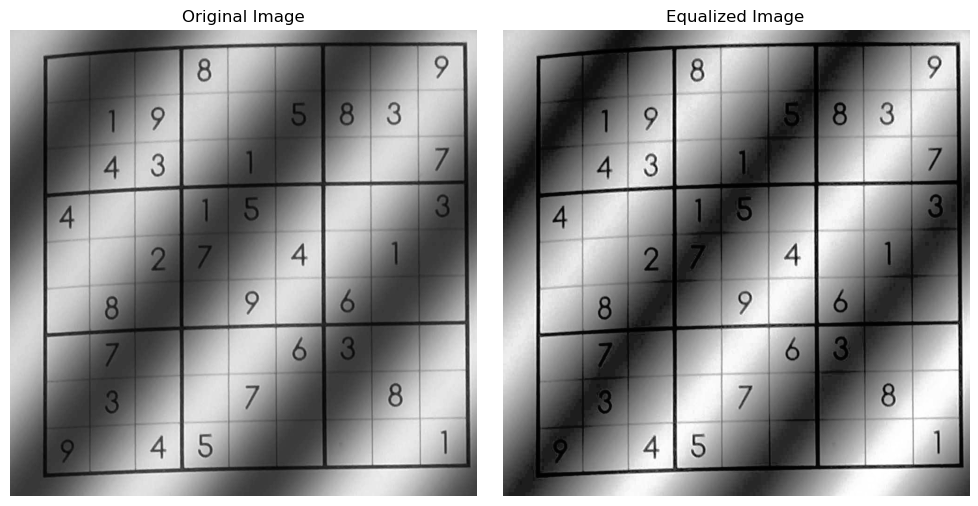

In [11]:
equalized_image = cv2.equalizeHist(img_gray)

# Display original and equalized images using Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

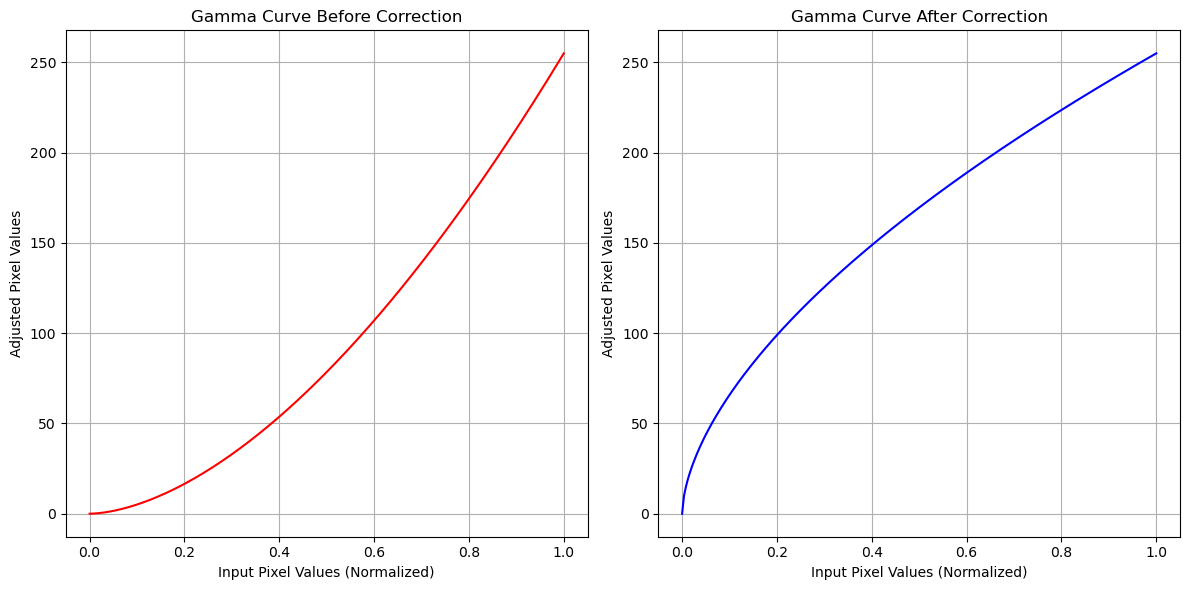

In [12]:
gamma = 1.7

# Generate input pixel values from 0 to 255
input_values = np.arange(0, 256) / 255.0

# Calculate adjusted values using gamma correction formula before and after
adjusted_values_before = np.power(input_values, gamma) * 255.0
adjusted_values_after = np.power(input_values, 1/gamma) * 255.0

# Plot the gamma curves before and after gamma correction
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(input_values, adjusted_values_before, color='red')
plt.title('Gamma Curve Before Correction')
plt.xlabel('Input Pixel Values (Normalized)')
plt.ylabel('Adjusted Pixel Values')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(input_values, adjusted_values_after, color='blue')
plt.title('Gamma Curve After Correction')
plt.xlabel('Input Pixel Values (Normalized)')
plt.ylabel('Adjusted Pixel Values')
plt.grid(True)

plt.tight_layout()
plt.show()

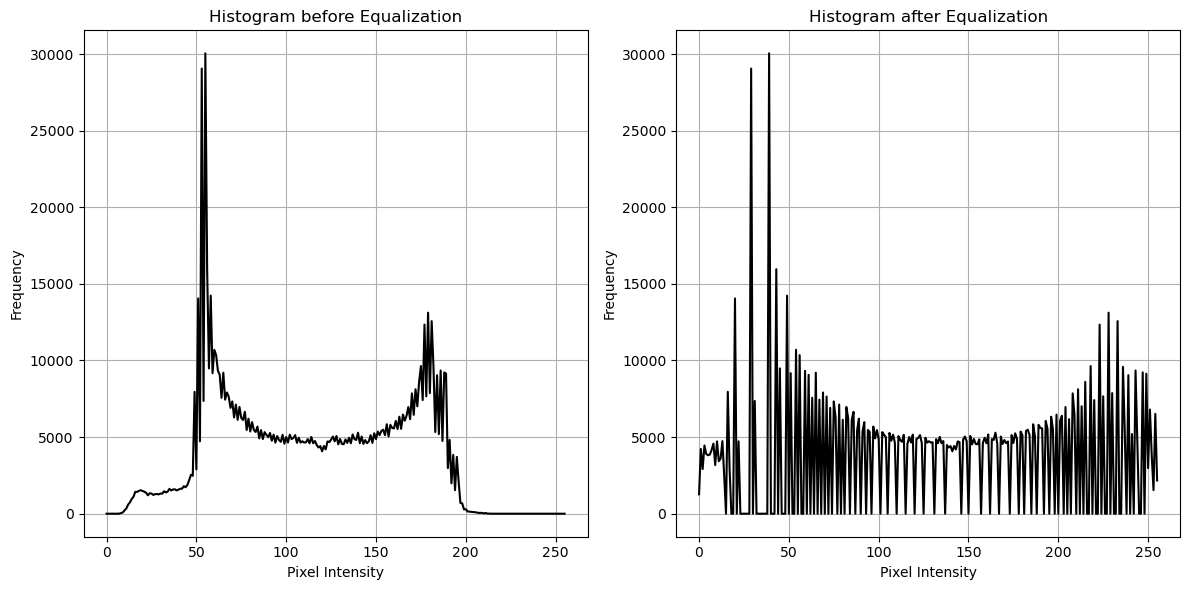

In [13]:
hist_original = cv2.calcHist([img_gray], [0], None, [256], [0,256])


# Calculate histogram of equalized image
hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0,256])

# Plot histograms before and after equalization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(hist_original, color='black')
plt.title('Histogram before Equalization')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(hist_equalized, color='black')
plt.title('Histogram after Equalization')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

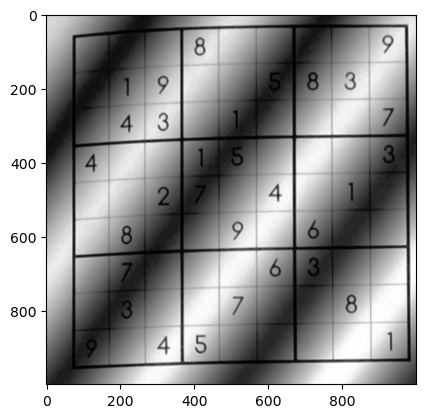

In [14]:
img_gray_equalized = cv2.equalizeHist(img_gray)
img_gray_blurred = cv2.GaussianBlur(img_gray_equalized, (7, 7), 0)
plt.imshow(img_gray_blurred,cmap='gray')
plt.show()



# Thresholding step
We don't need the full scale of grayscale either, just binary. But, is ordinary thresholding enough? Or is "adaptive thresholding" better?

Do your research!


### Adaptive Thresholding is better because it will adapt to the change of light intensity along the image as we see here global thresholding will alaways result in losing some of the image due to the change of light intensity along the image

Text(0.5, 1.0, 'Global Thresholding')

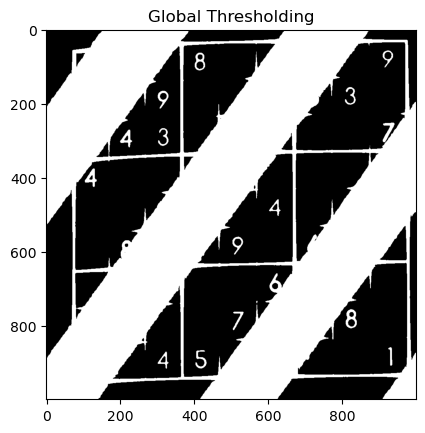

In [15]:
_, img_gray_global_threshed = cv2.threshold(img_gray_blurred, 127, 255, cv2.THRESH_BINARY_INV)
plt.imshow(img_gray_global_threshed, cmap='gray')
plt.title('Global Thresholding')



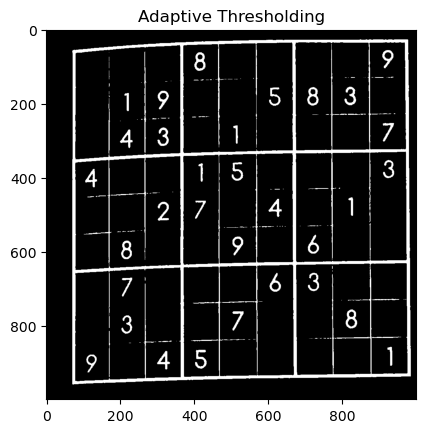

In [16]:
img_gray_threshed = cv2.adaptiveThreshold(src=img_gray,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=blockSize,
    C=c
)
plt.title('Adaptive Thresholding') 
plt.imshow(img_gray_threshed, cmap="gray");

In [17]:
####################ADDED just trying some morphological methods################
#kernel1 =np.ones((2,2),np.uint8)
#dilation =cv2.morphologyEx(img_gray_threshed,cv2.MORPH_CLOSE,kernel1)
#plt.imshow(closing,cmap="gray")


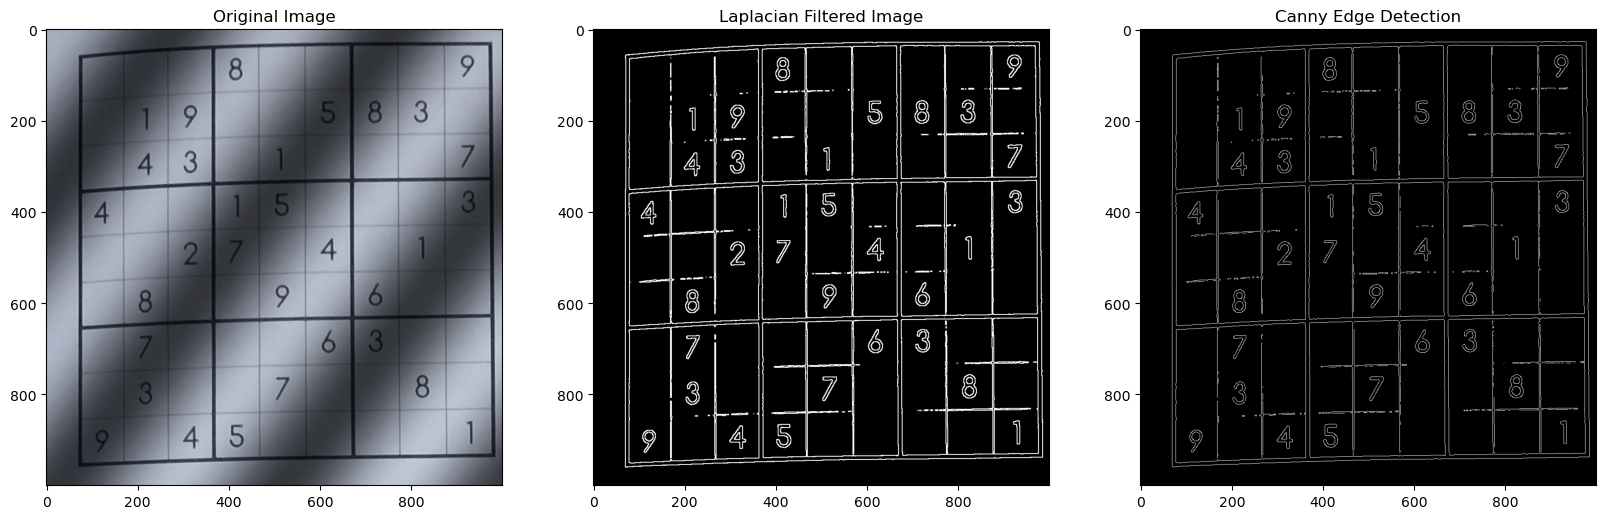

In [18]:
###########Added by Mazen###################
# Load the original image
image_original = img

# Convert image to grayscale
image_gray = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

# Reduce noise in image
img_gauss = cv2.GaussianBlur(img_gray_threshed, (3, 3), 0)

# Filter the image using Laplacian
filtered_image = cv2.Laplacian(img_gray_threshed, cv2.CV_16S, ksize=3)
filtered_image = cv2.convertScaleAbs(filtered_image)

# Apply Canny edge detection on the filtered image
edges = cv2.Canny(img_gray_threshed, threshold1=15, threshold2=255)  # Adjust thresholds as needed

# Plotting the results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 15))
ax1.set_title('Original Image')
ax1.imshow(cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB))

ax2.set_title('Laplacian Filtered Image')
ax2.imshow(filtered_image, cmap='gray')

ax3.set_title('Canny Edge Detection')
ax3.imshow(edges, cmap='gray')

plt.show()


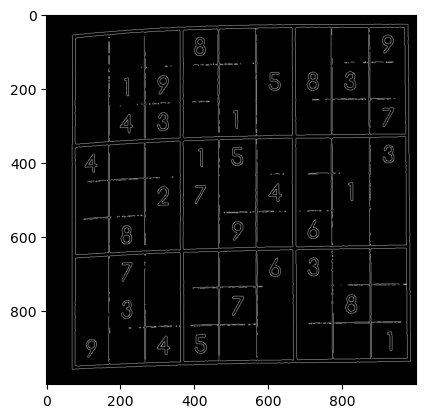

In [19]:
bilateral_image = cv2.bilateralFilter(edges, 9, 75, 75)#for img 13
plt.imshow(cv2.cvtColor(bilateral_image, cv2.COLOR_BGR2RGB))
plt.show()

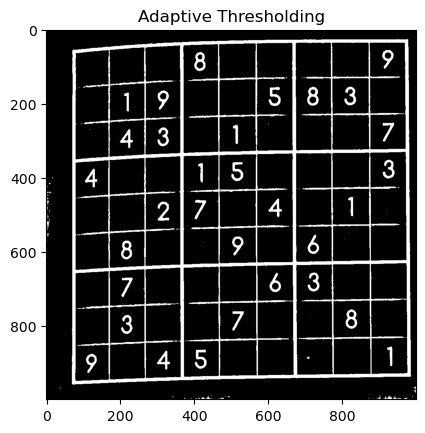

In [20]:
img_gray_threshed = cv2.adaptiveThreshold(src=img_gray,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=111,
    C=5
)
plt.title('Adaptive Thresholding')
plt.imshow(img_gray_threshed, cmap="gray");

# Detect the lines
One way is to use Hough transform. It may not be the best way, there are other ways, and I've done zero noise removal in this guide so far.

This is very sub-optimal and will most likely not work reliably on all cases. Do your research!

### Enhancement : One way is getting the biggest contour in the image 

In [21]:
####################ADDED################
def biggestContour (contours):
    biggest=np.array([])

    max_area=0
    for i in contours:
        area=cv2.contourArea(i)
        if area>1000:
            peri=cv2.arcLength(i,True)
            approx=cv2.approxPolyDP(i,0.02*peri,True)
            if area > max_area and len(approx)==4:
                biggest=approx
                max_area=area
    return biggest,max_area
def reorder(myPoints):
    myPoints=myPoints.reshape((4,2))
    myPointsNew=np.zeros((4,1,2),dtype=np.int32)
    add=myPoints.sum(1)
    myPointsNew[0]=myPoints[np.argmin(add)]
    myPointsNew[3]=myPoints[np.argmax(add)]
    diff=np.diff(myPoints,axis=1)
    myPointsNew[1]=myPoints[np.argmin(diff)]
    myPointsNew[2]=myPoints[np.argmax(diff)]
    return myPointsNew

    


In [22]:
# image = cv2.imread('C:/Users/Mazen Mohamed/Downloads/05-Ya3amSheel2elCoinYa3am.jpg')
#
# points_to_remove = np.array([
#     [935, 92],
#     [800, 92],
#     [760, 92],
#     [790, 92],
#     [795, 92]
# ])
#
# # Create a mask to cover the points to be removed
# mask = np.zeros_like(image, dtype=np.uint8)
# cv2.fillPoly(mask, [points_to_remove], (255, 255, 255))  # Fill the points with white color (you can change the color)
#
# # Invert the mask
# mask_inv = cv2.bitwise_not(mask)
#
# # Apply the mask to the image to remove the specified points
# result = cv2.bitwise_and(image, mask_inv)
# res=cv2.cvtColor(result,cv2.COLOR_RGB2GRAY)
# plt.imshow(result,cmap="gray")

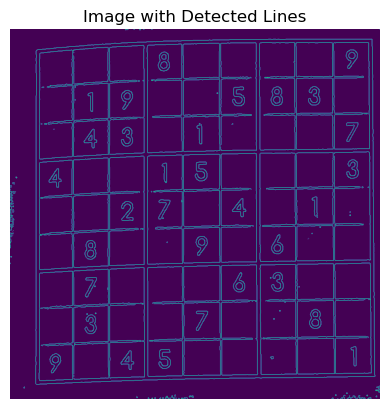

In [23]:

edges = cv2.Canny(img_gray_threshed,50,150,apertureSize = 3)
lines = cv2.HoughLinesP(edges,1,np.pi/180,20,minLineLength=100,maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(255,255,255),2)
# Display the image with detected lines using Matplotlib
plt.imshow(edges)
plt.axis('off')  # Turn off axis labels
plt.title('Image with Detected Lines')
plt.show()


In [24]:
if mean_intensity==114.199791:  #for img 13
    img_gray_threshed=bilateral_image
else:
    img_gray_threshed=img_gray_threshed

### Outer frame corners identification

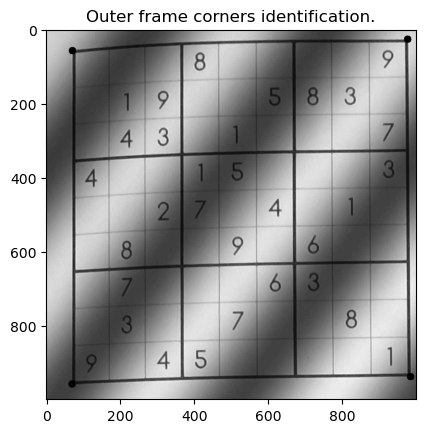

In [25]:
####################ADDED################
heightImg=600
widthImg=600
imgContours=img_gray.copy()
imgBigContour=img_gray.copy()
contours, hierarchy, =cv2.findContours(img_gray_threshed,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(imgContours,contours,-1,(0,255,0),10)
biggest,maxArea=biggestContour(contours)
if biggest.size !=0:
    biggest=reorder(biggest)
    cv2.drawContours(imgBigContour,biggest,-1,(0,255,0),20)

    pts1=np.float32(biggest)
    pts2=np.float32([[0,0],[widthImg,0],[0,heightImg],[widthImg,heightImg]])
    matrix=cv2.getPerspectiveTransform(pts1,pts2)
    imgWrapedgrey=cv2.warpPerspective(img_gray,matrix,(widthImg,heightImg))
    # imgDetectedDigits=imgBlank.copy()

    # imgWrapedColored=cv2.cvtColor(imgWarpColored,cv2.COLOR_BGR2GRAY)
plt.title('Outer frame corners identification.') 
plt.imshow(imgBigContour,cmap="gray")

In [26]:
# # Assuming closed_image is your binary image
# contours, hier = cv2.findContours(img_gray_threshed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#
# # Sort contours based on their areas in descending order
# contours = sorted(contours, key=cv2.contourArea, reverse=True)
#
# # Initialize an empty mask
# mask = np.zeros(img_gray_threshed.shape, np.uint8)
#
# # Iterate through the sorted contours
# for cnt in contours:
#     area = cv2.contourArea(cnt)
#
#     # Filter contours based on your criteria, e.g., area > 1000
#     if area > 1000:
#         best_cnt = cnt
#
#         # Draw the largest contour filled with white on the mask
#         cv2.drawContours(mask, [best_cnt], 0, 255, thickness=cv2.FILLED)
#
#         # Draw the same contour with a thickness of 2 in black
#         cv2.drawContours(mask, [best_cnt], 0, 200, thickness=30)
#
#         break  # Assuming the first contour meeting the criteria is the Sudoku puzzle
#
# # Bitwise AND operation to mask the original image
# res = cv2.bitwise_and(img_gray_threshed, mask)
#
# # Display the result
# plt.imshow(res, cmap="gray")
# plt.show()

## Image warpping (Outer frame isolation)

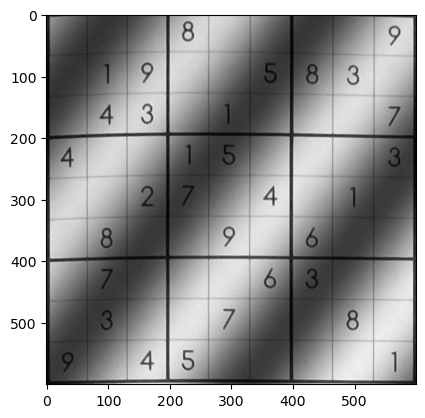

In [27]:
####################ADDED################
plt.imshow(imgWrapedgrey,cmap="gray")


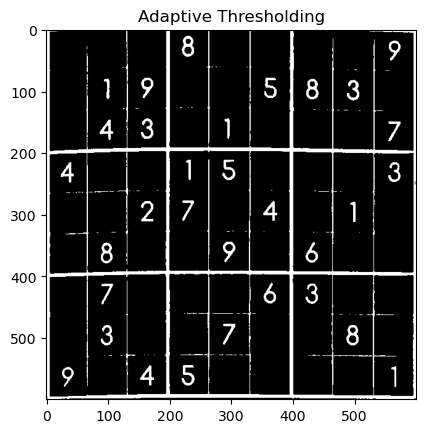

In [28]:
####################ADDED################

img_gray_threshed = cv2.adaptiveThreshold(src=imgWrapedgrey,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=blockSize,
    C=c


)
plt.title('Adaptive Thresholding') 
plt.imshow(img_gray_threshed, cmap="gray");

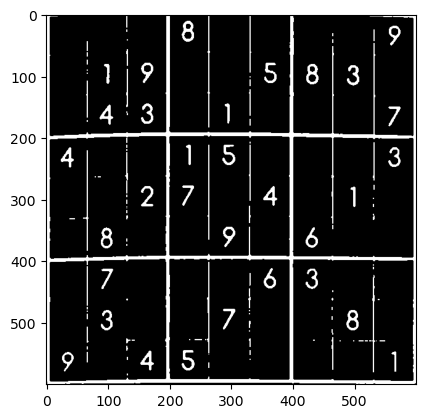

In [29]:
kernel_size = 3
img_median_filtered = cv2.medianBlur(img_gray_threshed, kernel_size)
plt.imshow(img_median_filtered,cmap="gray")

# Separate the number tiles
Finally, you get each value in a tile of its own, ready to go to phase 2 (OCR).

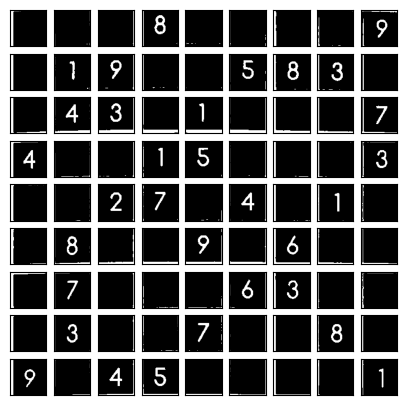

In [30]:
#CHANGED img_gray_threshed_warped to img_gray_threshed

M = img_gray_threshed.shape[0] // 9
N = img_gray_threshed.shape[1] // 9
number_tiles = []
for i in range(9):
    number_tiles.append([])
    for j in range(9):
        tile = img_gray_threshed[i*M:(i+1)*M, j*N:(j+1)*N]
        number_tiles[i].append(tile)

_, axes = plt.subplots(9, 9, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        col.imshow(number_tiles[i][j], cmap="gray");
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)
        

In [31]:
 def splitsquares(img):
        rows=np.vsplit(img,9) #vertical split
        boxes=[]
        for r in rows:
            cols=np.hsplit(r,9) #horizontal split
            for box in cols:
                boxes.append(box)
        return boxes         

In [32]:
#import cv2
#import numpy as np
#import matplotlib.pyplot as plt

# Load the templates
#template_images = []
#for i in range(9):
   # template_path = cv2.imread(f"{i+1}.jpg", cv2.IMREAD_GRAYSCALE)
    
 
    
  

 #  _, axes = plt.subplots(3, 3, figsize=(5, 5))
#for i, row in enumerate(axes):
   # for j, col in enumerate(row):
        #col.imshow(template_path[i*3+j], cmap="gray", vmin=-1, vmax=1);
        #col.get_xaxis().set_visible(False)
        #col.get_yaxis().set_visible(False)
   


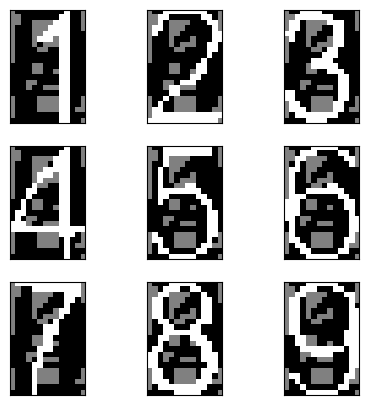

In [33]:
digit_ses = []
for i in range(9):
    se = cv2.imread(f"{i+1}.jpg", cv2.IMREAD_GRAYSCALE)
    se_canvas = np.zeros_like(se, dtype = np.int16)
    se_canvas[se < 64] = -1
    se_canvas[se > 192] = 1
    digit_ses.append(se_canvas)
_, axes = plt.subplots(3, 3, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        col.imshow(digit_ses[i*3+j], cmap="gray", vmin=-1, vmax=1);
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)
   

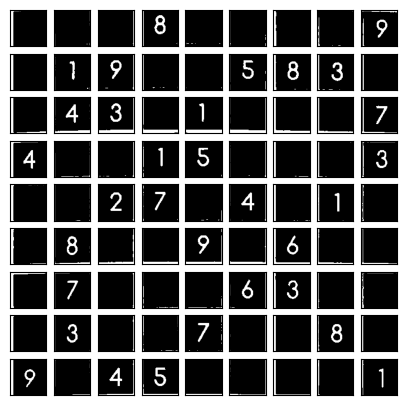

In [34]:
tiles = [cv2.threshold(number_tiles[t//9][t%9], 250, 255, cv2.THRESH_BINARY)[1] for t in range(9*9)]
# 9*9 looping from 0 to 80 to iterate over whole tiles where u try to return tile tile 
_, axes = plt.subplots(9, 9, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        col.imshow(tiles[i*9 + j], cmap="gray");
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)

In [35]:
# This method will tell me if the digit exists in the image or not
# But it won't tell me where; if exists
#This Function iterates over all windows in image and calculate score of matching between each image and similarity of it 
def se_match(se, image):
    se_height, se_width = se.shape
    MAX_SCORE = np.sum(se == 1) * 4
    score = 0

    for y in range(image.shape[0] - se_height): #as height of image cannot be smaller than height of structure element
        for x in range(image.shape[1] - se_width): #as width of image cannot be smaller than width of structure element 
            window = image[y:y+se_height, x:x+se_width] # get coordinates of window that comparison will be done through it 
            #This line extracts a sub-image (window) from the larger image (image). The y:y+se_height part corresponds to the vertical range, and x:x+se_width corresponds to the horizontal range. Essentially, it defines a rectangular region in 
            #the image, creating a window centered around the current position
            temp_score = np.sum((window == 255) & (se == 1)) * 4 #pixels in window that matches structure element 
            temp_score -= np.sum((window == 0) & (se == -1))   # 
            #minus foreground from background 
            score = max(score, temp_score)
            #final score used to access similairty between window and structure element 
            #0 gray and -1 background and 1 foreground which is digit

    return max(0, score / MAX_SCORE)




In [36]:
##### Trying to modify ###########
suduko_matrix=np.zeros(9*9)

for tile_index, tile in enumerate(tiles):
    #tile_index keeps track for the tile index while loop is iterating over all tiles 
    max_confidence = -100
    max_confidence_tile = None
    trial_variable=-120
    for se_index, se in enumerate(digit_ses): #Nested within the outer loop, this loop iterates over each structural element (se) in the digit_ses 
                                            #list, and se_index keeps track of the index of the current structural element.
        isgreaterthan50=0 #flag 


        # To obtain scale-invariance, let's try different input sizes
        for h in range(tile.shape[0], se.shape[0], -1):
            #This loop tries different input sizes to achieve scale-invariance by iterating over the heights (h) of the tile, 
            #starting from
            #the original height down to the height of the structural element
            y, x = tile.shape
            resized_tile = cv2.resize(tile, ((h * x) // y, h), cv2.INTER_NEAREST)
            #The goal here is to vary the size of the tile by adjusting its height (h) while maintaining the original aspect ratio (x/y). 
            #The resizing is performed using the nearest-neighbor interpolation method (cv2.INTER_NEAREST)
            
            resized_tile = cv2.threshold(resized_tile, 1, 255, cv2.THRESH_BINARY)[1]
            
            confidence = se_match(se, resized_tile) 
            #every time i loop i give different size of tile and compare it with structure element
            if confidence >= max_confidence:
                max_confidence = confidence
                max_confidence_tile = resized_tile #max_confidence_tile will hold tile which had greatest match with structure element
                if 100 * max_confidence > 60:
                    suduko_matrix[tile_index]=se_index+1
               
                    
                    
                    
                
                

        # At this point, max_confidence contains the maximum confidence for the current tile and se pair
        # max_confidence_tile contains the resized tile with the highest confidence
        
        # Perform further actions with the obtained results, such as storing or visualizing them
        # For example, you can print the index of the current tile and structural element with their corresponding maximum confidence:
        print(f"Tile Index: {tile_index}, SE Index: {se_index}, Max Confidence: {round(100 * max_confidence, 4)}%,Digit caught:{suduko_matrix[tile_index]}")
      
                
        

Tile Index: 0, SE Index: 0, Max Confidence: 0%,Digit caught:0.0
Tile Index: 0, SE Index: 1, Max Confidence: 25.6944%,Digit caught:0.0
Tile Index: 0, SE Index: 2, Max Confidence: 27.1605%,Digit caught:0.0
Tile Index: 0, SE Index: 3, Max Confidence: 27.1605%,Digit caught:0.0
Tile Index: 0, SE Index: 4, Max Confidence: 27.1605%,Digit caught:0.0
Tile Index: 0, SE Index: 5, Max Confidence: 36.0759%,Digit caught:0.0
Tile Index: 0, SE Index: 6, Max Confidence: 36.0759%,Digit caught:0.0
Tile Index: 0, SE Index: 7, Max Confidence: 36.6337%,Digit caught:0.0
Tile Index: 0, SE Index: 8, Max Confidence: 36.6337%,Digit caught:0.0
Tile Index: 1, SE Index: 0, Max Confidence: 0%,Digit caught:0.0
Tile Index: 1, SE Index: 1, Max Confidence: 0%,Digit caught:0.0
Tile Index: 1, SE Index: 2, Max Confidence: 0%,Digit caught:0.0
Tile Index: 1, SE Index: 3, Max Confidence: 0%,Digit caught:0.0
Tile Index: 1, SE Index: 4, Max Confidence: 0%,Digit caught:0.0
Tile Index: 1, SE Index: 5, Max Confidence: 0%,Digit cau

Tile Index: 13, SE Index: 6, Max Confidence: 0%,Digit caught:0.0
Tile Index: 13, SE Index: 7, Max Confidence: 0%,Digit caught:0.0
Tile Index: 13, SE Index: 8, Max Confidence: 0%,Digit caught:0.0
Tile Index: 14, SE Index: 0, Max Confidence: 39.0%,Digit caught:0.0
Tile Index: 14, SE Index: 1, Max Confidence: 45.4861%,Digit caught:0.0
Tile Index: 14, SE Index: 2, Max Confidence: 59.8765%,Digit caught:0.0
Tile Index: 14, SE Index: 3, Max Confidence: 59.8765%,Digit caught:0.0
Tile Index: 14, SE Index: 4, Max Confidence: 64.3382%,Digit caught:5.0
Tile Index: 14, SE Index: 5, Max Confidence: 64.3382%,Digit caught:5.0
Tile Index: 14, SE Index: 6, Max Confidence: 64.3382%,Digit caught:5.0
Tile Index: 14, SE Index: 7, Max Confidence: 65.3465%,Digit caught:8.0
Tile Index: 14, SE Index: 8, Max Confidence: 65.3465%,Digit caught:8.0
Tile Index: 15, SE Index: 0, Max Confidence: 64.0%,Digit caught:1.0
Tile Index: 15, SE Index: 1, Max Confidence: 72.2222%,Digit caught:2.0
Tile Index: 15, SE Index: 2, M

Tile Index: 26, SE Index: 7, Max Confidence: 52.3585%,Digit caught:0.0
Tile Index: 26, SE Index: 8, Max Confidence: 52.3585%,Digit caught:0.0
Tile Index: 27, SE Index: 0, Max Confidence: 75.5%,Digit caught:1.0
Tile Index: 27, SE Index: 1, Max Confidence: 75.5%,Digit caught:1.0
Tile Index: 27, SE Index: 2, Max Confidence: 75.5%,Digit caught:1.0
Tile Index: 27, SE Index: 3, Max Confidence: 82.3944%,Digit caught:4.0
Tile Index: 27, SE Index: 4, Max Confidence: 82.3944%,Digit caught:4.0
Tile Index: 27, SE Index: 5, Max Confidence: 82.3944%,Digit caught:4.0
Tile Index: 27, SE Index: 6, Max Confidence: 82.3944%,Digit caught:4.0
Tile Index: 27, SE Index: 7, Max Confidence: 82.3944%,Digit caught:4.0
Tile Index: 27, SE Index: 8, Max Confidence: 82.3944%,Digit caught:4.0
Tile Index: 28, SE Index: 0, Max Confidence: 0%,Digit caught:0.0
Tile Index: 28, SE Index: 1, Max Confidence: 0%,Digit caught:0.0
Tile Index: 28, SE Index: 2, Max Confidence: 0%,Digit caught:0.0
Tile Index: 28, SE Index: 3, Max 

Tile Index: 40, SE Index: 2, Max Confidence: 0%,Digit caught:0.0
Tile Index: 40, SE Index: 3, Max Confidence: 0%,Digit caught:0.0
Tile Index: 40, SE Index: 4, Max Confidence: 0%,Digit caught:0.0
Tile Index: 40, SE Index: 5, Max Confidence: 0%,Digit caught:0.0
Tile Index: 40, SE Index: 6, Max Confidence: 0%,Digit caught:0.0
Tile Index: 40, SE Index: 7, Max Confidence: 0%,Digit caught:0.0
Tile Index: 40, SE Index: 8, Max Confidence: 0%,Digit caught:0.0
Tile Index: 41, SE Index: 0, Max Confidence: 77.0%,Digit caught:1.0
Tile Index: 41, SE Index: 1, Max Confidence: 77.0%,Digit caught:1.0
Tile Index: 41, SE Index: 2, Max Confidence: 77.0%,Digit caught:1.0
Tile Index: 41, SE Index: 3, Max Confidence: 83.0986%,Digit caught:4.0
Tile Index: 41, SE Index: 4, Max Confidence: 83.0986%,Digit caught:4.0
Tile Index: 41, SE Index: 5, Max Confidence: 83.0986%,Digit caught:4.0
Tile Index: 41, SE Index: 6, Max Confidence: 83.0986%,Digit caught:4.0
Tile Index: 41, SE Index: 7, Max Confidence: 83.0986%,Dig

Tile Index: 53, SE Index: 5, Max Confidence: 0%,Digit caught:0.0
Tile Index: 53, SE Index: 6, Max Confidence: 0%,Digit caught:0.0
Tile Index: 53, SE Index: 7, Max Confidence: 3.4653%,Digit caught:0.0
Tile Index: 53, SE Index: 8, Max Confidence: 3.4653%,Digit caught:0.0
Tile Index: 54, SE Index: 0, Max Confidence: 6.0%,Digit caught:0.0
Tile Index: 54, SE Index: 1, Max Confidence: 34.7222%,Digit caught:0.0
Tile Index: 54, SE Index: 2, Max Confidence: 35.1852%,Digit caught:0.0
Tile Index: 54, SE Index: 3, Max Confidence: 35.1852%,Digit caught:0.0
Tile Index: 54, SE Index: 4, Max Confidence: 35.1852%,Digit caught:0.0
Tile Index: 54, SE Index: 5, Max Confidence: 40.5063%,Digit caught:0.0
Tile Index: 54, SE Index: 6, Max Confidence: 40.5063%,Digit caught:0.0
Tile Index: 54, SE Index: 7, Max Confidence: 43.0693%,Digit caught:0.0
Tile Index: 54, SE Index: 8, Max Confidence: 43.0693%,Digit caught:0.0
Tile Index: 55, SE Index: 0, Max Confidence: 29.0%,Digit caught:0.0
Tile Index: 55, SE Index: 1

Tile Index: 67, SE Index: 0, Max Confidence: 37.0%,Digit caught:0.0
Tile Index: 67, SE Index: 1, Max Confidence: 52.0833%,Digit caught:0.0
Tile Index: 67, SE Index: 2, Max Confidence: 52.0833%,Digit caught:0.0
Tile Index: 67, SE Index: 3, Max Confidence: 52.0833%,Digit caught:0.0
Tile Index: 67, SE Index: 4, Max Confidence: 52.0833%,Digit caught:0.0
Tile Index: 67, SE Index: 5, Max Confidence: 52.0833%,Digit caught:0.0
Tile Index: 67, SE Index: 6, Max Confidence: 55.1887%,Digit caught:0.0
Tile Index: 67, SE Index: 7, Max Confidence: 55.1887%,Digit caught:0.0
Tile Index: 67, SE Index: 8, Max Confidence: 55.1887%,Digit caught:0.0
Tile Index: 68, SE Index: 0, Max Confidence: 0%,Digit caught:0.0
Tile Index: 68, SE Index: 1, Max Confidence: 0%,Digit caught:0.0
Tile Index: 68, SE Index: 2, Max Confidence: 0%,Digit caught:0.0
Tile Index: 68, SE Index: 3, Max Confidence: 0%,Digit caught:0.0
Tile Index: 68, SE Index: 4, Max Confidence: 0%,Digit caught:0.0
Tile Index: 68, SE Index: 5, Max Confid

Tile Index: 80, SE Index: 3, Max Confidence: 33.0%,Digit caught:0.0
Tile Index: 80, SE Index: 4, Max Confidence: 33.0%,Digit caught:0.0
Tile Index: 80, SE Index: 5, Max Confidence: 33.0%,Digit caught:0.0
Tile Index: 80, SE Index: 6, Max Confidence: 33.0%,Digit caught:0.0
Tile Index: 80, SE Index: 7, Max Confidence: 33.0%,Digit caught:0.0
Tile Index: 80, SE Index: 8, Max Confidence: 33.0%,Digit caught:0.0


In [37]:
matrix1=suduko_matrix.reshape(9,9)
print(matrix1)

[[0. 0. 0. 8. 0. 0. 0. 0. 9.]
 [0. 0. 9. 0. 0. 8. 8. 3. 0.]
 [0. 4. 3. 0. 0. 0. 0. 0. 0.]
 [4. 0. 0. 0. 5. 0. 0. 0. 3.]
 [0. 0. 2. 0. 0. 4. 0. 0. 0.]
 [0. 8. 0. 0. 9. 0. 6. 0. 0.]
 [0. 0. 0. 0. 0. 6. 3. 0. 0.]
 [0. 3. 0. 0. 0. 0. 0. 8. 0.]
 [9. 0. 4. 8. 0. 0. 0. 0. 0.]]


In [ ]:
suduko_matrix=[]
for tile_index, tile in enumerate(tiles):  #tile_index keeps track for the tile index while loop is iterating over all tiles 
    for se_index, se in enumerate(digit_ses): #Nested within the outer loop, this loop iterates over each structural element (se) in the digit_ses 
                                            #list, and se_index keeps track of the index of the current structural element.
        max_confidence = -100
        max_confidence_tile = None

        # To obtain scale-invariance, let's try different input sizes
        for h in range(tile.shape[0], se.shape[0], -1):
            #This loop tries different input sizes to achieve scale-invariance by iterating over the heights (h) of the tile, 
            #starting from
            #the original height down to the height of the structural element
            y, x = tile.shape
            resized_tile = cv2.resize(tile, ((h * x) // y, h), cv2.INTER_NEAREST)
            #The goal here is to vary the size of the tile by adjusting its height (h) while maintaining the original aspect ratio (x/y). 
            #The resizing is performed using the nearest-neighbor interpolation method (cv2.INTER_NEAREST)
            
            resized_tile = cv2.threshold(resized_tile, 1, 255, cv2.THRESH_BINARY)[1]
            
            confidence = se_match(se, resized_tile) 
            #every time i loop i give different size of tile and compare it with structure element
            if confidence >= max_confidence:
                max_confidence = confidence
                max_confidence_tile = resized_tile #max_confidence_tile will hold tile which had greatest match with structure element
                max_confidence_digit=se_index+1
                

        # At this point, max_confidence contains the maximum confidence for the current tile and se pair
        # max_confidence_tile contains the resized tile with the highest confidence
        
        # Perform further actions with the obtained results, such as storing or visualizing them
        # For example, you can print the index of the current tile and structural element with their corresponding maximum confidence:
        print(f"Tile Index: {tile_index}, SE Index: {se_index}, Max Confidence: {round(100 * max_confidence, 4)}%")
      
                
        

Tile Index: 0, SE Index: 0, Max Confidence: 0%
Tile Index: 0, SE Index: 1, Max Confidence: 25.6944%
Tile Index: 0, SE Index: 2, Max Confidence: 27.1605%
Tile Index: 0, SE Index: 3, Max Confidence: 17.2535%
Tile Index: 0, SE Index: 4, Max Confidence: 26.8382%
Tile Index: 0, SE Index: 5, Max Confidence: 36.0759%
Tile Index: 0, SE Index: 6, Max Confidence: 23.1132%
Tile Index: 0, SE Index: 7, Max Confidence: 36.6337%
Tile Index: 0, SE Index: 8, Max Confidence: 30.6818%
Tile Index: 1, SE Index: 0, Max Confidence: 0%
Tile Index: 1, SE Index: 1, Max Confidence: 0%
Tile Index: 1, SE Index: 2, Max Confidence: 0%
Tile Index: 1, SE Index: 3, Max Confidence: 0%
Tile Index: 1, SE Index: 4, Max Confidence: 0%
Tile Index: 1, SE Index: 5, Max Confidence: 0%
Tile Index: 1, SE Index: 6, Max Confidence: 0%
Tile Index: 1, SE Index: 7, Max Confidence: 0%
Tile Index: 1, SE Index: 8, Max Confidence: 0%
Tile Index: 2, SE Index: 0, Max Confidence: 0%
Tile Index: 2, SE Index: 1, Max Confidence: 0%
Tile Index: 

In [ ]:
sitiles = []  # Scale-invariant tiles used to store structure elements with different sizes
y, x = tiles[0].shape
for i, tile in enumerate(tiles):
    sitiles.append([])
    for h in range(y//2, digit_ses[0].shape[0], -1):
        #This inner loop iterates over different heights (h) starting from half of the original tile's height (y//2) and going down to the height 
        #of the structural element for the digit 0 (digit_ses[0].shape[0]) in reverse order.
        resized_tile = cv2.resize(tile, ((h*x)//y, h), cv2.INTER_NEAREST) #resize current tile to specified H height 
        resized_tile = cv2.threshold(resized_tile, 1, 255, cv2.THRESH_BINARY)[1]
        sitiles[i].append(resized_tile)
    
     
      

In [ ]:
nest_asyncio.apply()

In [ ]:
sudoku_ocr = np.zeros((9*9,))

def ocr_progress(init=False):
    if init: ocr_progress.value = 0
    else: ocr_progress.value += 1
    print(f"\r[{u'█'*ocr_progress.value}{('-'*(9*9-ocr_progress.value))}] {ocr_progress.value}/{9*9} tiles processed.", end='')

async def ocr(tileno, min_confidence):
    max_confidence = -100
    max_confidence_se = None
    max_confidence_se_i = -1 #value of digit -1
    ax1 = fig.add_subplot(gs[tileno*7+1:(tileno+1)*7-1, 0]);
    ax1.set_title(f"Tile [{tileno//9}][{tileno%9}]");
    ax1.imshow(tiles[tileno], cmap="gray");
    for tile in sitiles[tileno]:
        for se_i, se in enumerate(digit_ses): #se_i to keep track of index of strcuture digit 
            confidence = se_match(se, tile)
            
            if confidence > max_confidence:
                max_confidence = confidence
                max_confidence_se = se  #put structure digit in varibale max_confidence_se
                max_confidence_se_i = se_i #put  digit-1 in max_confidence_se_i
                print("Max-Confidence",max_confidence)
                print("Min_Confidence",min_confidence)
               
    if max_confidence >= min_confidence:
        print(max_confidence)
        ax2 = fig.add_subplot(gs[tileno*7+2:(tileno+1)*7-2, 2]);
        ax2.set_title(f"S.E. [Confidence = {round(max_confidence*100, 4)}%]");
        ax2.imshow(max_confidence_se, cmap="gray");
        sudoku_ocr[tileno] = max_confidence_se_i + 1
    ocr_progress()

In [ ]:
fig = plt.figure(figsize=(8, 200))
gs = plt.GridSpec(7*9*9, 3)
ocr_progress(init=True)  # Initial progress (0 tiles processed)
await asyncio.wait(
    [asyncio.create_task(ocr(tileno, 0.14)) for tileno in range(9*9)],
   
);